# Creating Fair Voting Districts Clustering

## Import Statements

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.colors import ListedColormap
import seaborn as sns
import geopandas as gpd
import pandas as pd
import fiona 
from shapely.geometry import Point # Shapely for converting latitude/longtitude to geometry
from sklearn.cluster import KMeans
from shapely.wkt import loads as load_wkt
import numpy as np
from scipy import optimize
from numpy.linalg import matrix_power

## Open Shapefile with Fiona and GeoPandas

In [2]:
fiona.open('CO_census_block_2017.shp')
fiona.open('council_districts.shp')

<open Collection 'council_districts.shp:council_districts', mode 'r' at 0x1c857f33700>

In [3]:
##Import shape files for census blocks and council districts
colorado_init = gpd.read_file('CO_census_block_2017.shp')
council_init = gpd.read_file('council_districts.shp')

##Choose only census blocks in Denver County with populations greater than 0
colorado = colorado_init.loc[(colorado_init['pop'] != float(0)) & (colorado_init['geonum'].isin(['1080319801001',
'1080319800001',
'1080310157004',
'1080310157003',
'1080310157002',
'1080310157001',
'1080310156004',
'1080310156003',
'1080310156002',
'1080310156001',
'1080310155003',
'1080310155002',
'1080310155001',
'1080310154004',
'1080310154003',
'1080310154002',
'1080310154001',
'1080310153003',
'1080310153002',
'1080310153001',
'1080310120144',
'1080310120143',
'1080310120142',
'1080310120141',
'1080310120103',
'1080310120102',
'1080310120101',
'1080310120012',
'1080310120011',
'1080310119032',
'1080310119031',
'1080310119024',
'1080310119023',
'1080310119022',
'1080310119021',
'1080310083912',
'1080310083911',
'1080310083903',
'1080310083902',
'1080310083901',
'1080310083893',
'1080310083892',
'1080310083891',
'1080310083882',
'1080310083881',
'1080310083872',
'1080310083871',
'1080310083862',
'1080310083861',
'1080310083123',
'1080310083122',
'1080310083121',
'1080310083064',
'1080310083063',
'1080310083062',
'1080310083061',
'1080310083053',
'1080310083052',
'1080310083051',
'1080310083043',
'1080310083042',
'1080310083041',
'1080310070894',
'1080310070893',
'1080310070892',
'1080310070891',
'1080310070884',
'1080310070883',
'1080310070882',
'1080310070881',
'1080310070373',
'1080310070372',
'1080310070371',
'1080310070132',
'1080310070131',
'1080310070062',
'1080310070061',
'1080310069015',
'1080310069014',
'1080310069013',
'1080310069012',
'1080310069011',
'1080310068144',
'1080310068143',
'1080310068142',
'1080310068141',
'1080310068133',
'1080310068132',
'1080310068131',
'1080310068123',
'1080310068122',
'1080310068121',
'1080310068114',
'1080310068113',
'1080310068112',
'1080310068111',
'1080310068104',
'1080310068103',
'1080310068102',
'1080310068101',
'1080310068096',
'1080310068095',
'1080310068094',
'1080310068093',
'1080310068092',
'1080310068091',
'1080310068042',
'1080310068041',
'1080310067011',
'1080310055034',
'1080310055033',
'1080310055032',
'1080310055031',
'1080310055021',
'1080310053001',
'1080310052004',
'1080310052003',
'1080310052002',
'1080310052001',
'1080310051042',
'1080310051041',
'1080310051024',
'1080310051023',
'1080310051022',
'1080310051021',
'1080310050025',
'1080310050024',
'1080310050023',
'1080310050022',
'1080310050021',
'1080310050012',
'1080310050011',
'1080310048013',
'1080310048012',
'1080310048011',
'1080310047006',
'1080310047005',
'1080310047004',
'1080310047003',
'1080310047002',
'1080310047001',
'1080310046035',
'1080310046034',
'1080310046033',
'1080310046032',
'1080310046031',
'1080310046024',
'1080310046023',
'1080310046022',
'1080310046021',
'1080310046014',
'1080310046013',
'1080310046012',
'1080310046011',
'1080310045063',
'1080310045062',
'1080310045061',
'1080310045053',
'1080310045052',
'1080310045051',
'1080310045043',
'1080310045042',
'1080310045041',
'1080310045033',
'1080310045032',
'1080310045031',
'1080310044054',
'1080310044053',
'1080310044052',
'1080310044051',
'1080310044043',
'1080310044042',
'1080310044041',
'1080310044033',
'1080310044032',
'1080310044031',
'1080310043065',
'1080310043064',
'1080310043063',
'1080310043062',
'1080310043061',
'1080310043044',
'1080310043043',
'1080310043042',
'1080310043041',
'1080310043034',
'1080310043033',
'1080310043032',
'1080310043031',
'1080310043023',
'1080310043022',
'1080310043021',
'1080310043014',
'1080310043013',
'1080310043012',
'1080310043011',
'1080310042025',
'1080310042024',
'1080310042023',
'1080310042022',
'1080310042021',
'1080310042016',
'1080310042015',
'1080310042014',
'1080310042013',
'1080310042012',
'1080310042011',
'1080310041071',
'1080310041061',
'1080310041046',
'1080310041045',
'1080310041044',
'1080310041043',
'1080310041042',
'1080310041041',
'1080310041036',
'1080310041035',
'1080310041034',
'1080310041033',
'1080310041032',
'1080310041031',
'1080310041024',
'1080310041023',
'1080310041022',
'1080310041021',
'1080310041013',
'1080310041012',
'1080310041011',
'1080310040064',
'1080310040063',
'1080310040062',
'1080310040061',
'1080310040052',
'1080310040051',
'1080310040041',
'1080310040034',
'1080310040033',
'1080310040032',
'1080310040031',
'1080310040024',
'1080310040023',
'1080310040022',
'1080310040021',
'1080310039023',
'1080310039022',
'1080310039021',
'1080310039013',
'1080310039012',
'1080310039011',
'1080310038005',
'1080310038004',
'1080310038003',
'1080310038002',
'1080310038001',
'1080310037032',
'1080310037031',
'1080310037024',
'1080310037023',
'1080310037022',
'1080310037021',
'1080310037012',
'1080310037011',
'1080310036032',
'1080310036031',
'1080310036025',
'1080310036024',
'1080310036023',
'1080310036022',
'1080310036021',
'1080310036015',
'1080310036014',
'1080310036013',
'1080310036012',
'1080310036011',
'1080310035005',
'1080310035004',
'1080310035003',
'1080310035002',
'1080310035001',
'1080310034023',
'1080310034022',
'1080310034021',
'1080310034012',
'1080310034011',
'1080310033004',
'1080310033003',
'1080310033002',
'1080310033001',
'1080310032033',
'1080310032032',
'1080310032031',
'1080310032023',
'1080310032022',
'1080310032021',
'1080310032015',
'1080310032014',
'1080310032013',
'1080310032012',
'1080310032011',
'1080310031022',
'1080310031021',
'1080310031011',
'1080310030043',
'1080310030042',
'1080310030041',
'1080310030032',
'1080310030031',
'1080310030023',
'1080310030022',
'1080310030021',
'1080310030015',
'1080310030014',
'1080310030013',
'1080310030012',
'1080310030011',
'1080310029023',
'1080310029022',
'1080310029021',
'1080310029013',
'1080310029012',
'1080310029011',
'1080310028034',
'1080310028033',
'1080310028032',
'1080310028031',
'1080310028024',
'1080310028023',
'1080310028022',
'1080310028021',
'1080310028013',
'1080310028012',
'1080310028011',
'1080310027034',
'1080310027033',
'1080310027032',
'1080310027031',
'1080310027025',
'1080310027024',
'1080310027023',
'1080310027022',
'1080310027021',
'1080310027014',
'1080310027013',
'1080310027012',
'1080310027011',
'1080310026021',
'1080310026012',
'1080310026011',
'1080310024033',
'1080310024032',
'1080310024031',
'1080310024022',
'1080310024021',
'1080310023003',
'1080310023002',
'1080310023001',
'1080310021005',
'1080310021004',
'1080310021003',
'1080310021002',
'1080310021001',
'1080310020001',
'1080310019021',
'1080310019012',
'1080310019011',
'1080310018002',
'1080310018001',
'1080310017022',
'1080310017021',
'1080310017015',
'1080310017014',
'1080310017013',
'1080310017012',
'1080310017011',
'1080310016003',
'1080310016002',
'1080310016001',
'1080310015003',
'1080310015002',
'1080310015001',
'1080310014032',
'1080310014031',
'1080310014024',
'1080310014023',
'1080310014022',
'1080310014021',
'1080310014015',
'1080310014014',
'1080310014013',
'1080310014012',
'1080310014011',
'1080310013023',
'1080310013022',
'1080310013021',
'1080310013015',
'1080310013014',
'1080310013013',
'1080310013012',
'1080310013011',
'1080310011023',
'1080310011022',
'1080310011021',
'1080310011014',
'1080310011013',
'1080310011012',
'1080310011011',
'1080310010003',
'1080310010002',
'1080310010001',
'1080310009054',
'1080310009053',
'1080310009052',
'1080310009051',
'1080310009044',
'1080310009043',
'1080310009042',
'1080310009041',
'1080310009035',
'1080310009034',
'1080310009033',
'1080310009032',
'1080310009031',
'1080310009025',
'1080310009024',
'1080310009023',
'1080310009022',
'1080310009021',
'1080310008001',
'1080310007025',
'1080310007024',
'1080310007023',
'1080310007022',
'1080310007021',
'1080310007013',
'1080310007012',
'1080310007011',
'1080310006002',
'1080310006001',
'1080310005025',
'1080310005024',
'1080310005023',
'1080310005022',
'1080310005021',
'1080310005012',
'1080310005011',
'1080310004026',
'1080310004025',
'1080310004024',
'1080310004023',
'1080310004022',
'1080310004021',
'1080310004014',
'1080310004013',
'1080310004012',
'1080310004011',
'1080310003036',
'1080310003035',
'1080310003034',
'1080310003033',
'1080310003032',
'1080310003031',
'1080310003025',
'1080310003024',
'1080310003023',
'1080310003022',
'1080310003021',
'1080310003016',
'1080310003015',
'1080310003014',
'1080310003013',
'1080310003012',
'1080310003011',
'1080310002024',
'1080310002023',
'1080310002022',
'1080310002021',
'1080310002012',
'1080310002011',
'1080310001023',
'1080310001022',
'1080310001021']))]

##Take only population and geometry columns
colorado_clean = colorado[['pop','geometry']]
##Reindex values
colorado_clean = colorado_clean.reset_index(drop=True)

##Create an array with just population values
pop_col = colorado_clean['pop']
pop_reset= pop_col.reset_index(drop=True)

## Open CSV wtih Lat/Long for Possible Voting Locations

In [4]:
##Read in csv with voting locations in lat/long form
pol_locs = pd.read_csv('inPersonPolling.csv')
##turn DataFrame into numpy array
lat_long = pol_locs[['Lat','Long']].to_numpy()

##Creating a geometry column 
geometry = [Point(xy) for xy in zip(pol_locs['Long'], pol_locs['Lat'])]

# Coordinate reference system : WGS84
crs = {'init': 'epsg:4326'}

# Creating a Geographic data frame (which is used when calculating distances)
gdf = gpd.GeoDataFrame(pol_locs, crs=crs, geometry=geometry)

## Find 11 Voting Places for Center of Each District Via KMeans Clusterings

In [5]:
##Take voting locations and cluster them into 11 clusters (the number of distrcts we want)
kmeans = KMeans(n_clusters=11, random_state=0).fit(lat_long)

##Turn cluster centers in the lat/longs for our voting sites to be used in the LP
kmeans.cluster_centers_
voting_geometry = [Point(xy) for xy in zip(kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,0])]
crs = {'init': 'epsg:4326'}

# Creating a Geographic data frame 
voting_centers = gpd.GeoDataFrame(kmeans.cluster_centers_, crs=crs, geometry=voting_geometry)

## Center of Each Census Block

In [6]:
#Find center of each census block and reindex
census_centers = colorado_clean['geometry'].centroid
census_centers = census_centers.reset_index(drop=True)

## Create Matrix of Distances Between Census Blocks and Voting Locations

In [7]:
distances = np.zeros((len(voting_centers),len(census_centers)))

for i in range(0,len(voting_centers)):
    for j in range(0,len(census_centers)):
        distances[i,j] = voting_centers.loc[i,'geometry'].distance(census_centers.loc[j])

## LP for the Voting District Clusters

### Defintion of Functions for Building Constrained Clustering LP Matrices

In [8]:
'''
coeffs of optimization are the weights multiplied by 
the square distances. Function takes in a list of 
distances and the assciated population list.
returns (1, k*n) array 
Maybe use a dictionary for this
''' 

def get_coeffs(dist, pop):
	dist_arr = dist
	print(dist_arr.shape)
	pop_arr = np.array(pop)
	print(pop_arr.shape)
	coeffs = np.power(dist_arr, 2)*(pop)
	coeffs = coeffs.flatten()
	return coeffs

'''
input the number of districts and the size of each district, 
districts = int
pop = list of population sizes for each census block
return = array
'''

def pop_constraint(districts, pop):
	num_districts = districts
	size = (1.0/num_districts)*np.sum(pop)
	arr = size*np.ones(num_districts)
	return arr

'''
input polling locations (list)
input populations of each census block (list)
forms a matrix that enforces populations to sum limit
w1x(1,1) + ... + wkx(1,k) = P
returns an array
'''

def build_pop_constraints(districts, pop):
	pop_len = len(pop)
	num_rows = districts
	num_cols = num_rows*pop_len
	cons_mat = np.zeros((num_rows, num_cols))
	for i in range(num_rows):
		cons_mat[i, i*pop_len:(i+1)*pop_len] = pop[:]
	print('pop const mat:', cons_mat.shape)        
	return cons_mat

'''
input polling locations (list)
input populations of each census block (list)
builds sum constraint matrix for x(i,j) so that they sum to 1
returns array
'''

def build_sum_constraints(districts, pop):
	pop_len = len(pop)
	num_dist = districts
	num_rows = len(pop)
	num_cols = num_dist*pop_len
	cons_mat = np.zeros((num_rows, num_cols))
	for i in range(num_rows):
		cons_mat[i, i:num_cols:pop_len] = 1
	print('sum const mat:', cons_mat.shape)
	return cons_mat

def build_constraint_matrix(districts, pop):
	A_top = build_pop_constraints(districts, pop)
	print(A_top.shape)
	A_bot = build_sum_constraints(districts, pop)
	print(A_bot.shape)
	constraints = np.concatenate((A_top, A_bot), axis = 0)
	return constraints

### Running Constrained Clustering LP

In [9]:
districts = 11
pop = pop_reset.tolist()
dist = distances

##Coeffcients of function we are trying to optimize
coeffs = get_coeffs(dist, pop)

##"b" values for our LP
pop_constrs = pop_constraint(districts, pop)
ones = np.ones(len(pop))
eq = np.concatenate((pop_constrs, ones), axis = 0)

##"A" matrix for our LP
A = build_constraint_matrix(districts, pop)

##Running LP
optim = optimize.linprog(coeffs, A_eq = A, b_eq = eq, bounds = [0,1])

##Put "x" values from LP into array
output = optim.x.reshape((11,len(colorado_clean)))

(11, 480)
(480,)
pop const mat: (11, 5280)
(11, 5280)
sum const mat: (480, 5280)
(480, 5280)


<ipython-input-9-491f563fa72a>:17: OptimizeWarning: A_eq does not appear to be of full row rank. To improve performance, check the problem formulation for redundant equality constraints.
  optim = optimize.linprog(coeffs, A_eq = A, b_eq = eq, bounds = [0,1])


## Power Diagram

### Defintoin of Functions for Hyperplanes of LP

In [20]:
'''
Computes s_ij's from steffen's paper 
input a list (l x 2) of site loactions
return a (l x l x 2) matrix of normalized site directions
s_ij = [a,b] the unit vector that points at s_i from s_j
'''

def compute_site_directions(sites):
	l = len(sites)
	sites = np.array(sites)
	site_directions = np.zeros((l,l,2))
	for i in range(l):
		for j in range(l):
			if i == j:
				site_directions[i,j] = 0
			else:
				x = sites[j] - sites[i]
# 				x = x/(np.sqrt(x.dot(x)))
				x = x/(LA.norm(x))
				site_directions[i,j] = x
	return site_directions

'''
sigma_ij = max{s_ij * x | x in cluster i}
input : blocks {k x 2 matrix}
clusters {list (reshape to l x k matrix), c_ij is proportion of block j assigned
to site i} 
site_directions {l x l x 2 matrix, see above}
return sigmas {l x l matrix of floats}

'''

def get_sigmas(clusters, site_directions, blocks):
	(a,b,c) = site_directions.shape
	sigmas = np.zeros((a,b)) 
	k = len(blocks)
	for i in range(a):
		for j in range(b):
			sigma_candidates = []
			for alpha in range(k):      
				if clusters[i][alpha] > .00001:
					x = site_directions[i,j].dot(blocks[alpha])
					sigma_candidates.append(x)
			sigma = np.amax(sigma_candidates)
			sigmas[i, j] = sigma
	sigmas = sigmas.reshape(sigmas.size, -1)
	return sigmas

'''
Builds the constraint matrix for the LP
input sigmas - list of previously computed sigma values
output matrix, mat, where mat[i,0] = 1, mat[i, i+1] = -1
dim(mat) = (len(sigmas), len(sigmas) + 1)
'''


def build_constraints(sigmas):
	k = len(sigmas)
	mat = np.zeros((k, k+1))
	mat[:,0] = 1
	for i in range(k):
		mat[i, i+1] = -1
	return mat

def build_gamma_constraints(sites):
	count = 0
	n = len(sites)
	mat = np.zeros((int((n*n*(n*n+1))/2), n*n+1))
	for i in range(n):
		for j in range(i+1,n):
			mat[count, i*n+j+1] = 1
			mat[count, j*n+i+1] = 1
			count +=1
	return mat

'''
Input clusters, sites, and census blocks.
Return a matrix of size num_sites x num_sites
a_ij = (s_ij, gamma_ij)
'''

def get_hyperplanes(clusters, sites, blocks):
	l = len(sites)
	site_directions = compute_site_directions(sites)
	sigmas = get_sigmas(clusters, site_directions, blocks)
	constraint_matrix = build_constraints(sigmas)
	gamma_constraint = build_gamma_constraints(sites)
	gamma_b = np.zeros(int((l*l*(l*l+1))/2)).tolist()
	coeffs = np.zeros((l*l)+1)
	coeffs[0] = -1
	res = optimize.linprog(c = coeffs, A_ub = constraint_matrix, b_ub = -1*sigmas, A_eq = gamma_constraint, b_eq = gamma_b, bounds = (None, None))
	site_directions_flat = site_directions.reshape(l*l,2)
	k = len(site_directions_flat)
	hyperplanes = np.zeros((k,3))
	gammas = res.x.flatten()
	for i in range(k):
		val = np.append(site_directions_flat[i],(res.x[i+1]))
		hyperplanes[i] = val
	return hyperplanes

### Getting Hyperplanes

In [21]:
##Convert Voting Locations into array of sites
vote_lat = np.array(voting_centers.loc[:,'geometry'].x)
vote_long = np.array(voting_centers.loc[:,'geometry'].y)
sites_prep = np.column_stack((vote_lat,vote_long))

##Convert centers of census blocks to array of blocks
census_cent_lat = np.array(census_centers.x)
census_cent_long = np.array(census_centers.y)
blocks_prep = np.column_stack((census_cent_lat,census_cent_long))


sites = sites_prep.tolist()
clusters = output
blocks = blocks_prep

##Run Power Diagram LP
hyperplanes = get_hyperplanes(clusters, sites, blocks)

<ipython-input-20-4d394e7269c8>:91: OptimizeWarning: Solving system with option 'cholesky':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'cholesky' to False.
  res = optimize.linprog(c = coeffs, A_ub = constraint_matrix, b_ub = -1*sigmas, A_eq = gamma_constraint, b_eq = gamma_b, bounds = (None, None))
<ipython-input-20-4d394e7269c8>:91: OptimizeWarning: Solving system with option 'sym_pos':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'sym_pos' to False.
  res = optimize.linprog(c = coeffs, A_ub = constraint_matrix, b_ub = -1*sigmas, A_eq = gamma_constraint, b_eq = gamma_b, bounds = (None, None))


### Graphing Hyperplanes

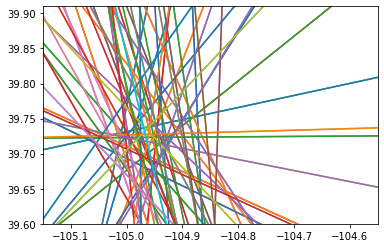

In [22]:
##Set bounds of values to plot
lat_max, lat_min = -104.55,-105.15
long_min,long_max = 39.6 ,39.91 

##Plot hyperplanes found in Power Diagram LP
for i in range(len(hyperplanes)):
    if (hyperplanes[i,1] != float(0)):
        x_1 = [lat_min, lat_max] 
        y_1 = [(hyperplanes[i,2] - hyperplanes[i,0]*lat_min)/hyperplanes[i,1],(hyperplanes[i,2] - hyperplanes[i,0]*lat_max)/hyperplanes[i,1]]
        plt.plot(x_1,y_1)
        plt.xlim(lat_min, lat_max)
        plt.ylim(long_min, long_max)
        
plt.show()

## Plot of Colorado Census Blocks with coloring based on Population

In [23]:
##Find the cluster for which each census block is putting the majoirty of it's population into
cluster_fracs = np.concatenate((colorado_clean,output.transpose()),axis=1)
cluster = np.zeros(len(colorado_clean))
                   
for i in range(len(cluster)):
    cluster[i] = np.argmax(cluster_fracs[i,2:13])
                   
##Add cluster value to array of data for each census block
cluster = cluster.reshape(len(colorado_clean),1)
colorado_comp = np.concatenate((cluster_fracs,cluster),axis=1)

### Plot of Council Districts with Boundaries

<AxesSubplot:>

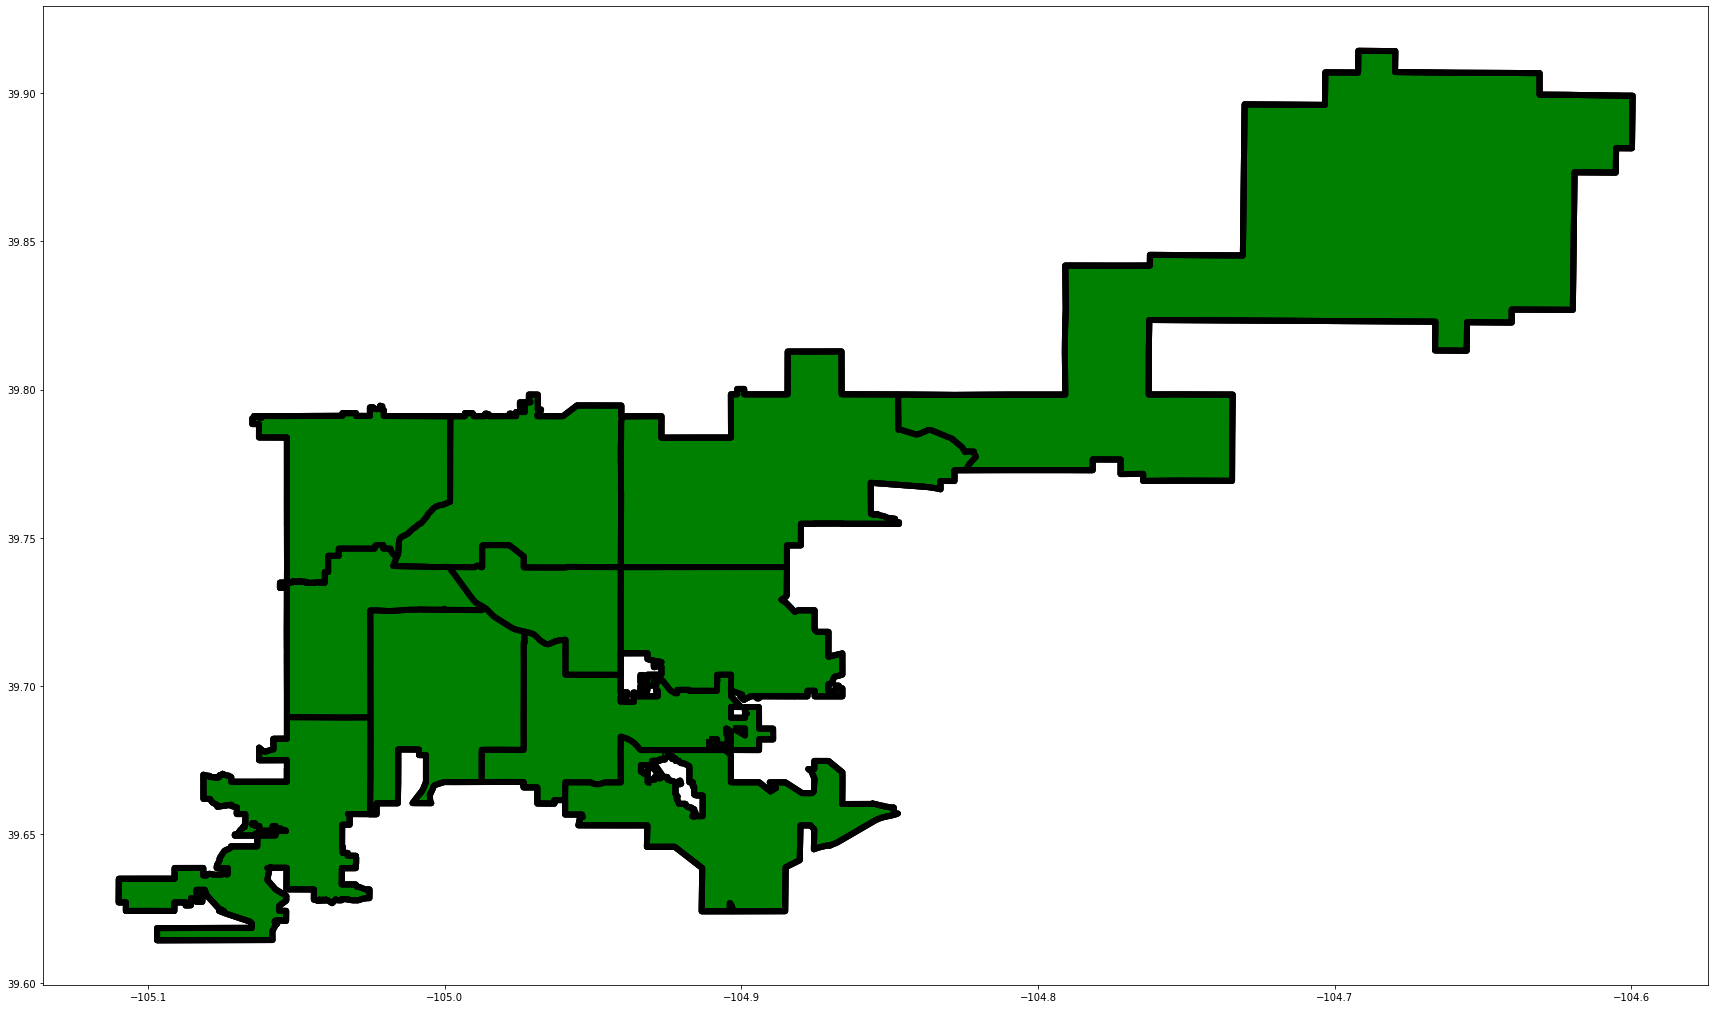

In [24]:
fig, ax1 = plt.subplots(figsize=(30, 18))
council_init.boundary.plot(linewidth=6, edgecolor='black', ax = ax1)
council_init.plot(color = 'green',linewidth=0.8, edgecolor='black',ax = ax1)

### All Other Plotting (Can change depending on plot desired.)

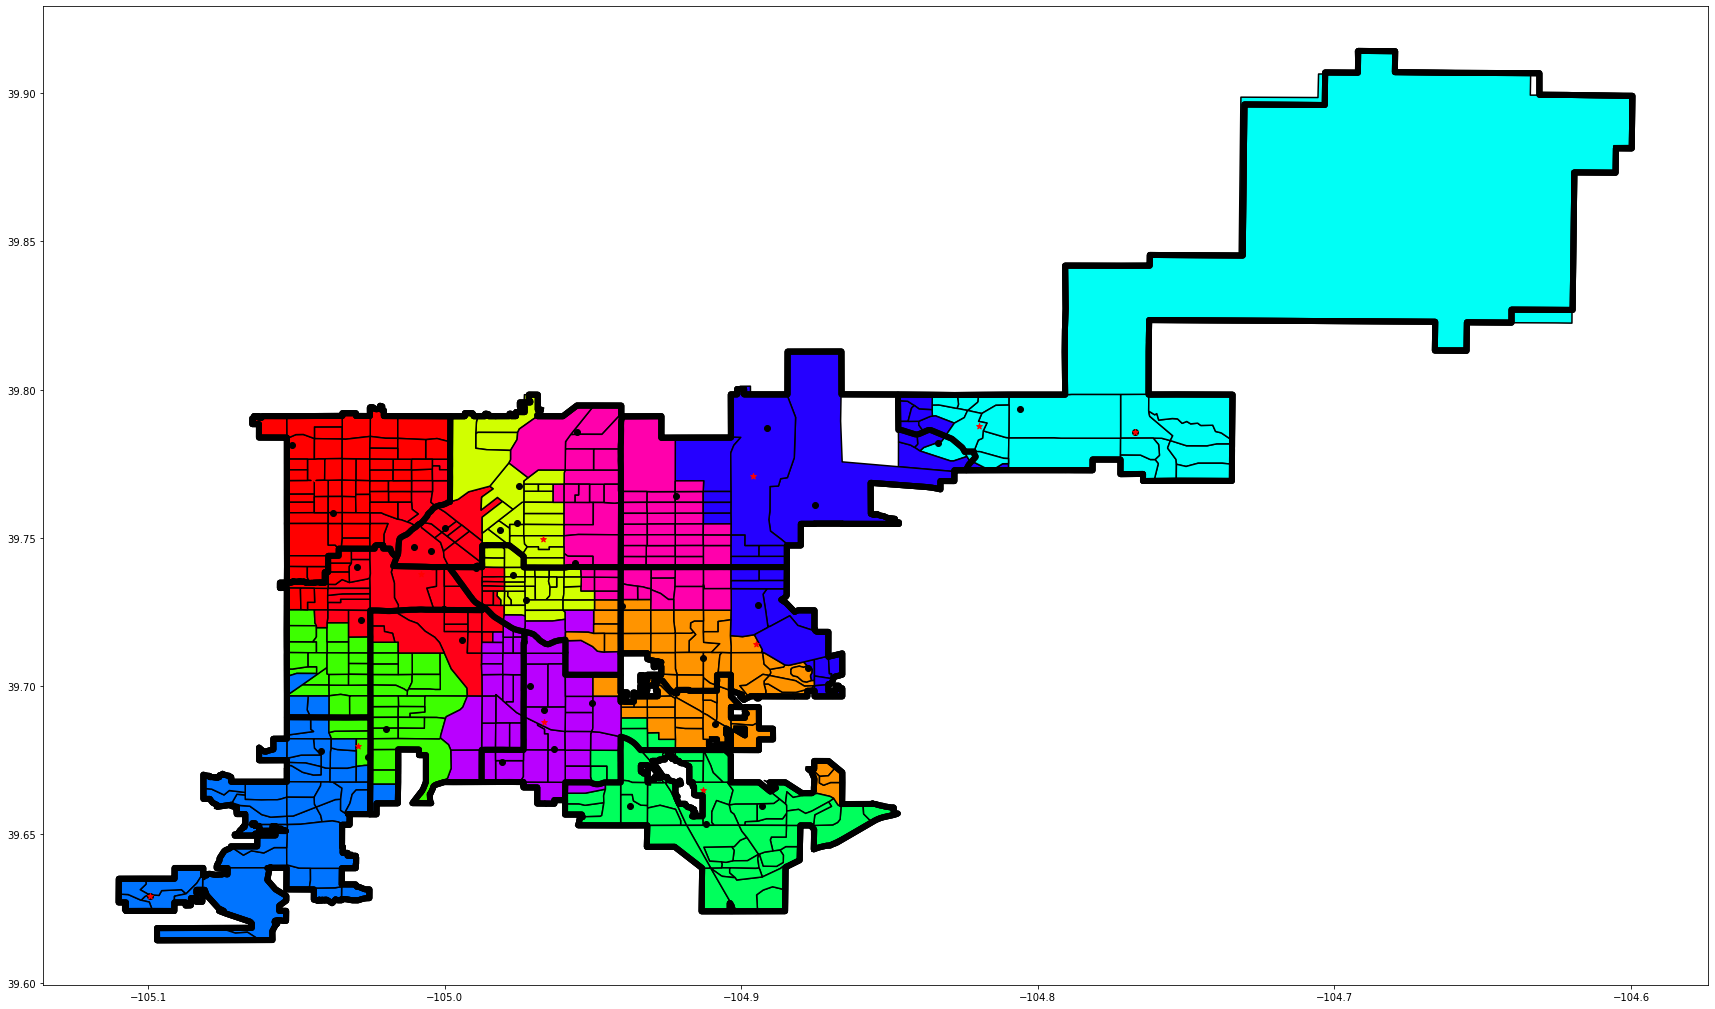

In [25]:
##Plot Clusters colored as well as Council District Boundaries
fig, ax = plt.subplots(figsize = (30,18))
##Plots census blocks colored yb cluster
colorado_clean.plot(colorado_comp[:,13], cmap='hsv', linewidth=1.5, edgecolor='black', figsize=(30, 18),ax = ax)

##Plots Council District Boundaries
council_init.boundary.plot(linewidth=6, edgecolor='black', figsize=(30, 18), ax = ax)

##Plots original voting locations and 
x, y = pol_locs['Long'].values, pol_locs['Lat'].values
ax.scatter(x,y, marker="o", color='k')

##Plots k-means cluster centers of voting locations
w, v = kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,0]
ax.scatter(w,v, marker="*", color='r')

####Used to plot hyplanes on top of Map
# for j in range(11):
#     if (hyperplanes[j,1] != float(0)):
#         x_1 = [lat_min, lat_max] 
#         y_1 = [(hyperplanes[j,2] - hyperplanes[j,0]*lat_min)/hyperplanes[j,1],(hyperplanes[j,2] - hyperplanes[j,0]*lat_max)/hyperplanes[j,1]]  
#         ax.plot(x_1,y_1)
#         plt.xlim(lat_min, lat_max)
#         plt.ylim(long_min, long_max)

plt.show()